In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [3]:
true_b = 1
true_w = 2
N = 100

In [4]:
np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = 0.1 * np.random.randn(N, 1)
y = true_b + true_w * x + epsilon
x.shape, y.shape

((100, 1), (100, 1))

In [5]:
np.arange(N)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [6]:
idx = np.arange(N)
np.random.shuffle(idx)
idx

array([76, 83, 80, 98,  2, 77, 71, 84, 89, 50, 40, 51, 67, 86, 37, 49,  4,
       10, 69, 81,  9, 54, 55, 87, 64, 44, 90, 75, 33, 30, 93, 95, 14, 61,
       11, 13, 15,  7,  0, 19, 35,  6, 12, 65, 70, 88, 56, 58, 28, 38, 91,
       42,  8, 73, 39, 85, 25, 92, 41, 26,  1, 22, 21, 46, 74, 79, 78, 72,
       57, 53, 24, 17, 66, 32, 31, 62, 59, 52, 82, 23, 36,  5, 45, 99, 43,
       16, 48, 94, 34,  3, 18, 47, 60, 68, 63, 27, 96, 29, 20, 97])

In [7]:
train_idx = idx[:int(0.8 * N)]
val_idx = idx[int(0.8 * N):]
train_idx.size, val_idx.size

(80, 20)

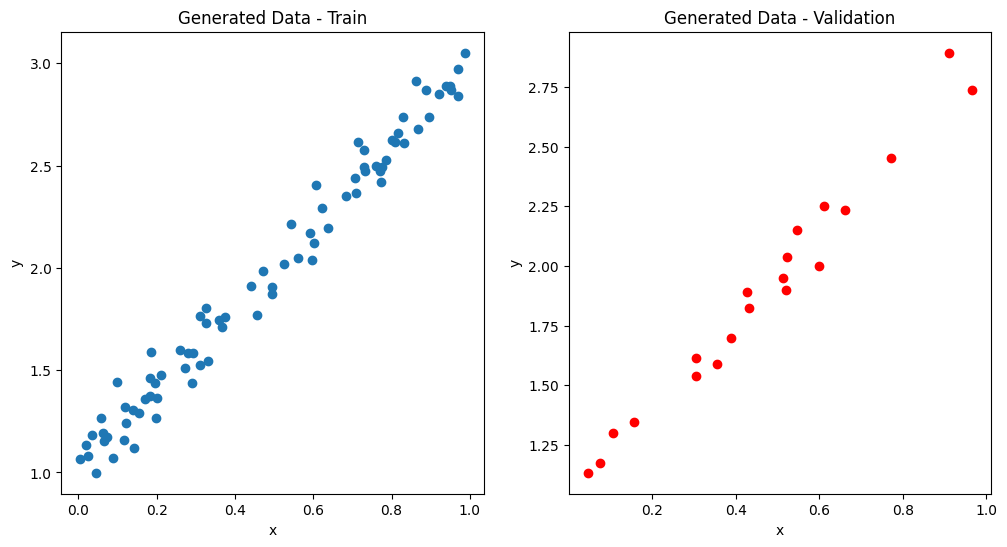

In [8]:
from plot import figure1


x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

figure1(x_train=x_train, y_train=y_train, x_val=x_val, y_val=y_val)


In [9]:
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)
b, w

(array([0.49671415]), array([-0.1382643]))

(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

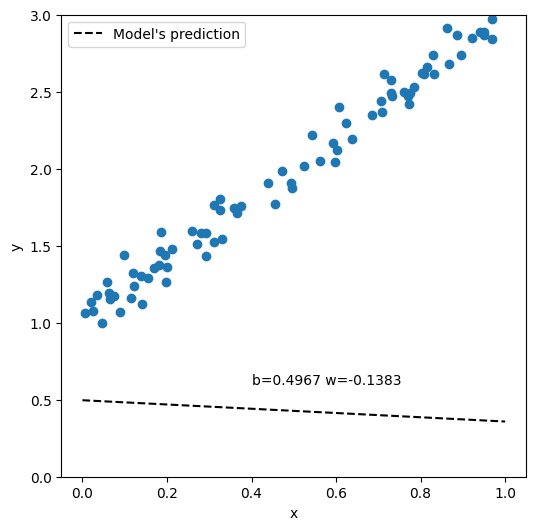

In [10]:
from plot import figure2


figure2(x_train, y_train, b,w)

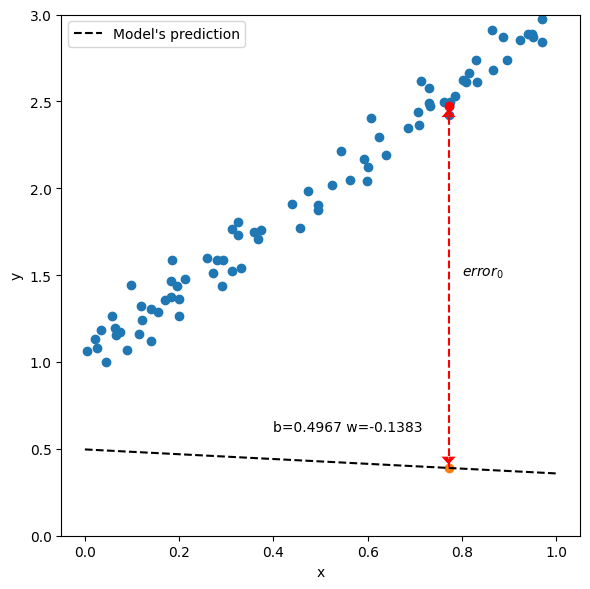

In [11]:
from plot import figure3


figure3(x_train=x_train, y_train=y_train, b=b, w=w)

In [12]:
yhat = b + w * x_train
error = yhat - y_train
loss = (error ** 2).mean()

In [13]:
loss

np.float64(2.7421577700550976)

In [14]:
b_range = np.linspace(true_b-3, true_b+3, 101)
w_range = np.linspace(true_w-3, true_w+3, 101)

bs, ws = np.meshgrid(b_range, w_range)
bs, ws

(array([[-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
        [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
        [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
        ...,
        [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
        [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
        [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ]], shape=(101, 101)),
 array([[-1.  , -1.  , -1.  , ..., -1.  , -1.  , -1.  ],
        [-0.94, -0.94, -0.94, ..., -0.94, -0.94, -0.94],
        [-0.88, -0.88, -0.88, ..., -0.88, -0.88, -0.88],
        ...,
        [ 4.88,  4.88,  4.88, ...,  4.88,  4.88,  4.88],
        [ 4.94,  4.94,  4.94, ...,  4.94,  4.94,  4.94],
        [ 5.  ,  5.  ,  5.  , ...,  5.  ,  5.  ,  5.  ]], shape=(101, 101)))

In [15]:
dummy_x = x_train[0]
dummy_yhat = bs + ws * dummy_x
dummy_yhat.shape

(101, 101)

In [16]:
y_train.shape, x_train.shape

((80, 1), (80, 1))

In [17]:
all_predictions = np.apply_along_axis(
    func1d=lambda x: bs + ws * x,
    axis=1,
    arr=x_train
)
all_predictions.shape

(80, 101, 101)

In [18]:
all_labels = y_train.reshape(-1,1,1)
all_labels.shape

(80, 1, 1)

In [19]:
all_errors = (all_predictions - all_labels)
all_errors.shape

(80, 101, 101)

In [20]:
all_losses = (all_errors ** 2).mean(axis=0)
all_losses.shape

(101, 101)

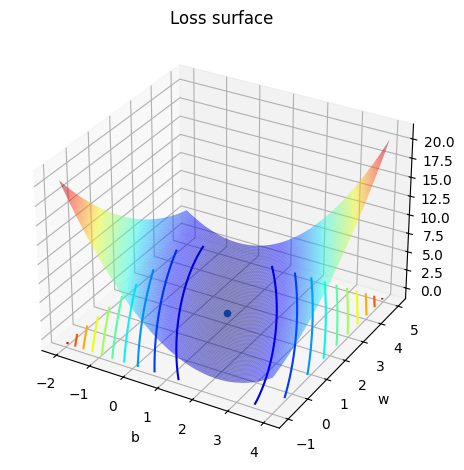

In [28]:
from plot import figure4
figure4(x_train, y_train, b, w, bs, ws, all_losses)